Date: 5-Oct-23

Time Series forecating: Air quality (Bangkok)
- Learning from: Prasert Kanawattanachai (CBS)
- Youtube: https://www.youtube.com/prasertcbs
- Github: https://github.com/prasertcbs/
- Dataset: bangkok-air-quality.csv (source: https://aqicn.org/data-platform/register/)

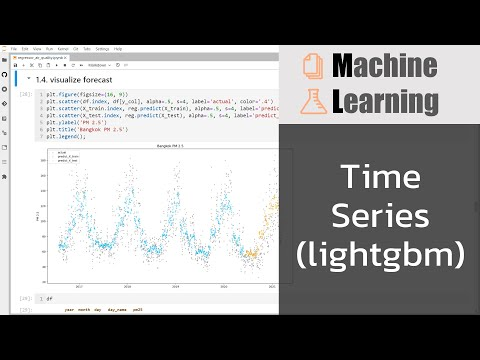

In [3]:
# load Video

from IPython.display import YouTubeVideo

YouTubeVideo('COtinIQk12w', width = 720, height = 405)

In [4]:
# import libraries

import sys
import pandas as pd
import numpy as np
import math
import matplotlib.pylab as plt

from pprint import pprint

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
import warnings

warnings.filterwarnings('ignore')

In [6]:
# read data to a dataframe

url = 'https://github.com/prasertcbs/basic-dataset/raw/master/bangkok-air-quality.csv'
data = pd.read_csv(url)
data.head()

,date,pm25,pm10,o3,no2,so2,co
0,2021/3/1,93,30,8,6,1,
1,2021/3/2,68,27,7,5,1,
2,2021/3/3,58,37,13,9,1,
3,2021/3/4,74,35,13,6,,
4,2021/3/5,72,38,15,6,1,


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2624 non-null   object
 1    pm25   2624 non-null   object
 2    pm10   2624 non-null   object
 3    o3     2624 non-null   object
 4    no2    2624 non-null   object
 5    so2    2624 non-null   object
 6    co     2624 non-null   object
dtypes: object(7)
memory usage: 143.6+ KB


In [8]:
data = pd.read_csv(url, parse_dates = ['date'], na_values = ' ', skipinitialspace = True)
data.head()

,date,pm25,pm10,o3,no2,so2,co
0,2021-03-01,93.0,30.0,8.0,6.0,1.0,NaN
1,2021-03-02,68.0,27.0,7.0,5.0,1.0,NaN
2,2021-03-03,58.0,37.0,13.0,9.0,1.0,NaN
3,2021-03-04,74.0,35.0,13.0,6.0,NaN,NaN
4,2021-03-05,72.0,38.0,15.0,6.0,1.0,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2624 non-null   datetime64[ns]
 1   pm25    1680 non-null   float64       
 2   pm10    2609 non-null   float64       
 3   o3      2610 non-null   float64       
 4   no2     2611 non-null   float64       
 5   so2     1877 non-null   float64       
 6   co      963 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 143.6 KB


In [10]:
data = data.sort_values('date').reset_index(drop = True).copy()
data

,date,pm25,pm10,o3,no2,so2,co
0,2013-12-31,NaN,NaN,68.0,33.0,3.0,7.0
1,2014-01-01,NaN,84.0,90.0,48.0,5.0,16.0
2,2014-01-02,NaN,84.0,119.0,63.0,7.0,14.0
3,2014-01-03,NaN,103.0,95.0,57.0,7.0,13.0
4,2014-01-04,NaN,101.0,52.0,34.0,1.0,NaN
...,...,...,...,...,...,...,...
2619,2021-03-10,98.0,53.0,16.0,12.0,1.0,NaN
2620,2021-03-11,111.0,52.0,19.0,10.0,NaN,NaN
2621,2021-03-12,101.0,48.0,15.0,7.0,1.0,NaN
2622,2021-03-13,96.0,32.0,9.0,4.0,1.0,NaN


In [11]:
y_col = 'pm25'
y_col

'pm25'

In [12]:
# drop NA referred to column pm25

data.dropna(subset = [y_col], inplace = True)

In [13]:
data

,date,pm25,pm10,o3,no2,so2,co
938,2016-07-30,61.0,19.0,17.0,15.0,8.0,6.0
939,2016-07-31,68.0,24.0,25.0,13.0,7.0,6.0
940,2016-08-01,60.0,20.0,26.0,14.0,2.0,6.0
941,2016-08-02,68.0,25.0,21.0,14.0,7.0,6.0
942,2016-08-03,70.0,26.0,23.0,16.0,2.0,6.0
...,...,...,...,...,...,...,...
2619,2021-03-10,98.0,53.0,16.0,12.0,1.0,NaN
2620,2021-03-11,111.0,52.0,19.0,10.0,NaN,NaN
2621,2021-03-12,101.0,48.0,15.0,7.0,1.0,NaN
2622,2021-03-13,96.0,32.0,9.0,4.0,1.0,NaN


In [14]:
# reset index

data = data.reset_index(drop = True)
data

,date,pm25,pm10,o3,no2,so2,co
0,2016-07-30,61.0,19.0,17.0,15.0,8.0,6.0
1,2016-07-31,68.0,24.0,25.0,13.0,7.0,6.0
2,2016-08-01,60.0,20.0,26.0,14.0,2.0,6.0
3,2016-08-02,68.0,25.0,21.0,14.0,7.0,6.0
4,2016-08-03,70.0,26.0,23.0,16.0,2.0,6.0
...,...,...,...,...,...,...,...
1675,2021-03-10,98.0,53.0,16.0,12.0,1.0,NaN
1676,2021-03-11,111.0,52.0,19.0,10.0,NaN,NaN
1677,2021-03-12,101.0,48.0,15.0,7.0,1.0,NaN
1678,2021-03-13,96.0,32.0,9.0,4.0,1.0,NaN


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1680 non-null   datetime64[ns]
 1   pm25    1680 non-null   float64       
 2   pm10    1672 non-null   float64       
 3   o3      1672 non-null   float64       
 4   no2     1672 non-null   float64       
 5   so2     943 non-null    float64       
 6   co      31 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 92.0 KB


In [16]:
# create a function to separate year, month, day, day name (Sunday-Saturday)

def date_parts(data, date_col = 'date'):
    
    ''' 
    create new columns for year, month, day, and day name
    '''

    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['day_name'] = data['date'].dt.day_name().astype('category')

In [17]:
# call a function above to get new data from 'date' column

date_parts(data)

In [18]:
data

,date,pm25,pm10,o3,no2,so2,co,year,month,day,day_name
0,2016-07-30,61.0,19.0,17.0,15.0,8.0,6.0,2016,7,30,Saturday
1,2016-07-31,68.0,24.0,25.0,13.0,7.0,6.0,2016,7,31,Sunday
2,2016-08-01,60.0,20.0,26.0,14.0,2.0,6.0,2016,8,1,Monday
3,2016-08-02,68.0,25.0,21.0,14.0,7.0,6.0,2016,8,2,Tuesday
4,2016-08-03,70.0,26.0,23.0,16.0,2.0,6.0,2016,8,3,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
1675,2021-03-10,98.0,53.0,16.0,12.0,1.0,NaN,2021,3,10,Wednesday
1676,2021-03-11,111.0,52.0,19.0,10.0,NaN,NaN,2021,3,11,Thursday
1677,2021-03-12,101.0,48.0,15.0,7.0,1.0,NaN,2021,3,12,Friday
1678,2021-03-13,96.0,32.0,9.0,4.0,1.0,NaN,2021,3,13,Saturday


In [19]:
data.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'year', 'month',
       'day', 'day_name'],
      dtype='object')

In [20]:
# select columns and save to new dataframe

df = data[['date', 'year', 'month', 'day', 'day_name', y_col]]
df

,date,year,month,day,day_name,pm25
0,2016-07-30,2016,7,30,Saturday,61.0
1,2016-07-31,2016,7,31,Sunday,68.0
2,2016-08-01,2016,8,1,Monday,60.0
3,2016-08-02,2016,8,2,Tuesday,68.0
4,2016-08-03,2016,8,3,Wednesday,70.0
...,...,...,...,...,...,...
1675,2021-03-10,2021,3,10,Wednesday,98.0
1676,2021-03-11,2021,3,11,Thursday,111.0
1677,2021-03-12,2021,3,12,Friday,101.0
1678,2021-03-13,2021,3,13,Saturday,96.0


In [21]:
# set date to be an index

df = df.set_index('date')
df

,year,month,day,day_name,pm25
date,,,,,
2016-07-30,2016,7,30,Saturday,61.0
2016-07-31,2016,7,31,Sunday,68.0
2016-08-01,2016,8,1,Monday,60.0
2016-08-02,2016,8,2,Tuesday,68.0
2016-08-03,2016,8,3,Wednesday,70.0
...,...,...,...,...,...
2021-03-10,2021,3,10,Wednesday,98.0
2021-03-11,2021,3,11,Thursday,111.0
2021-03-12,2021,3,12,Friday,101.0


### Visualize data

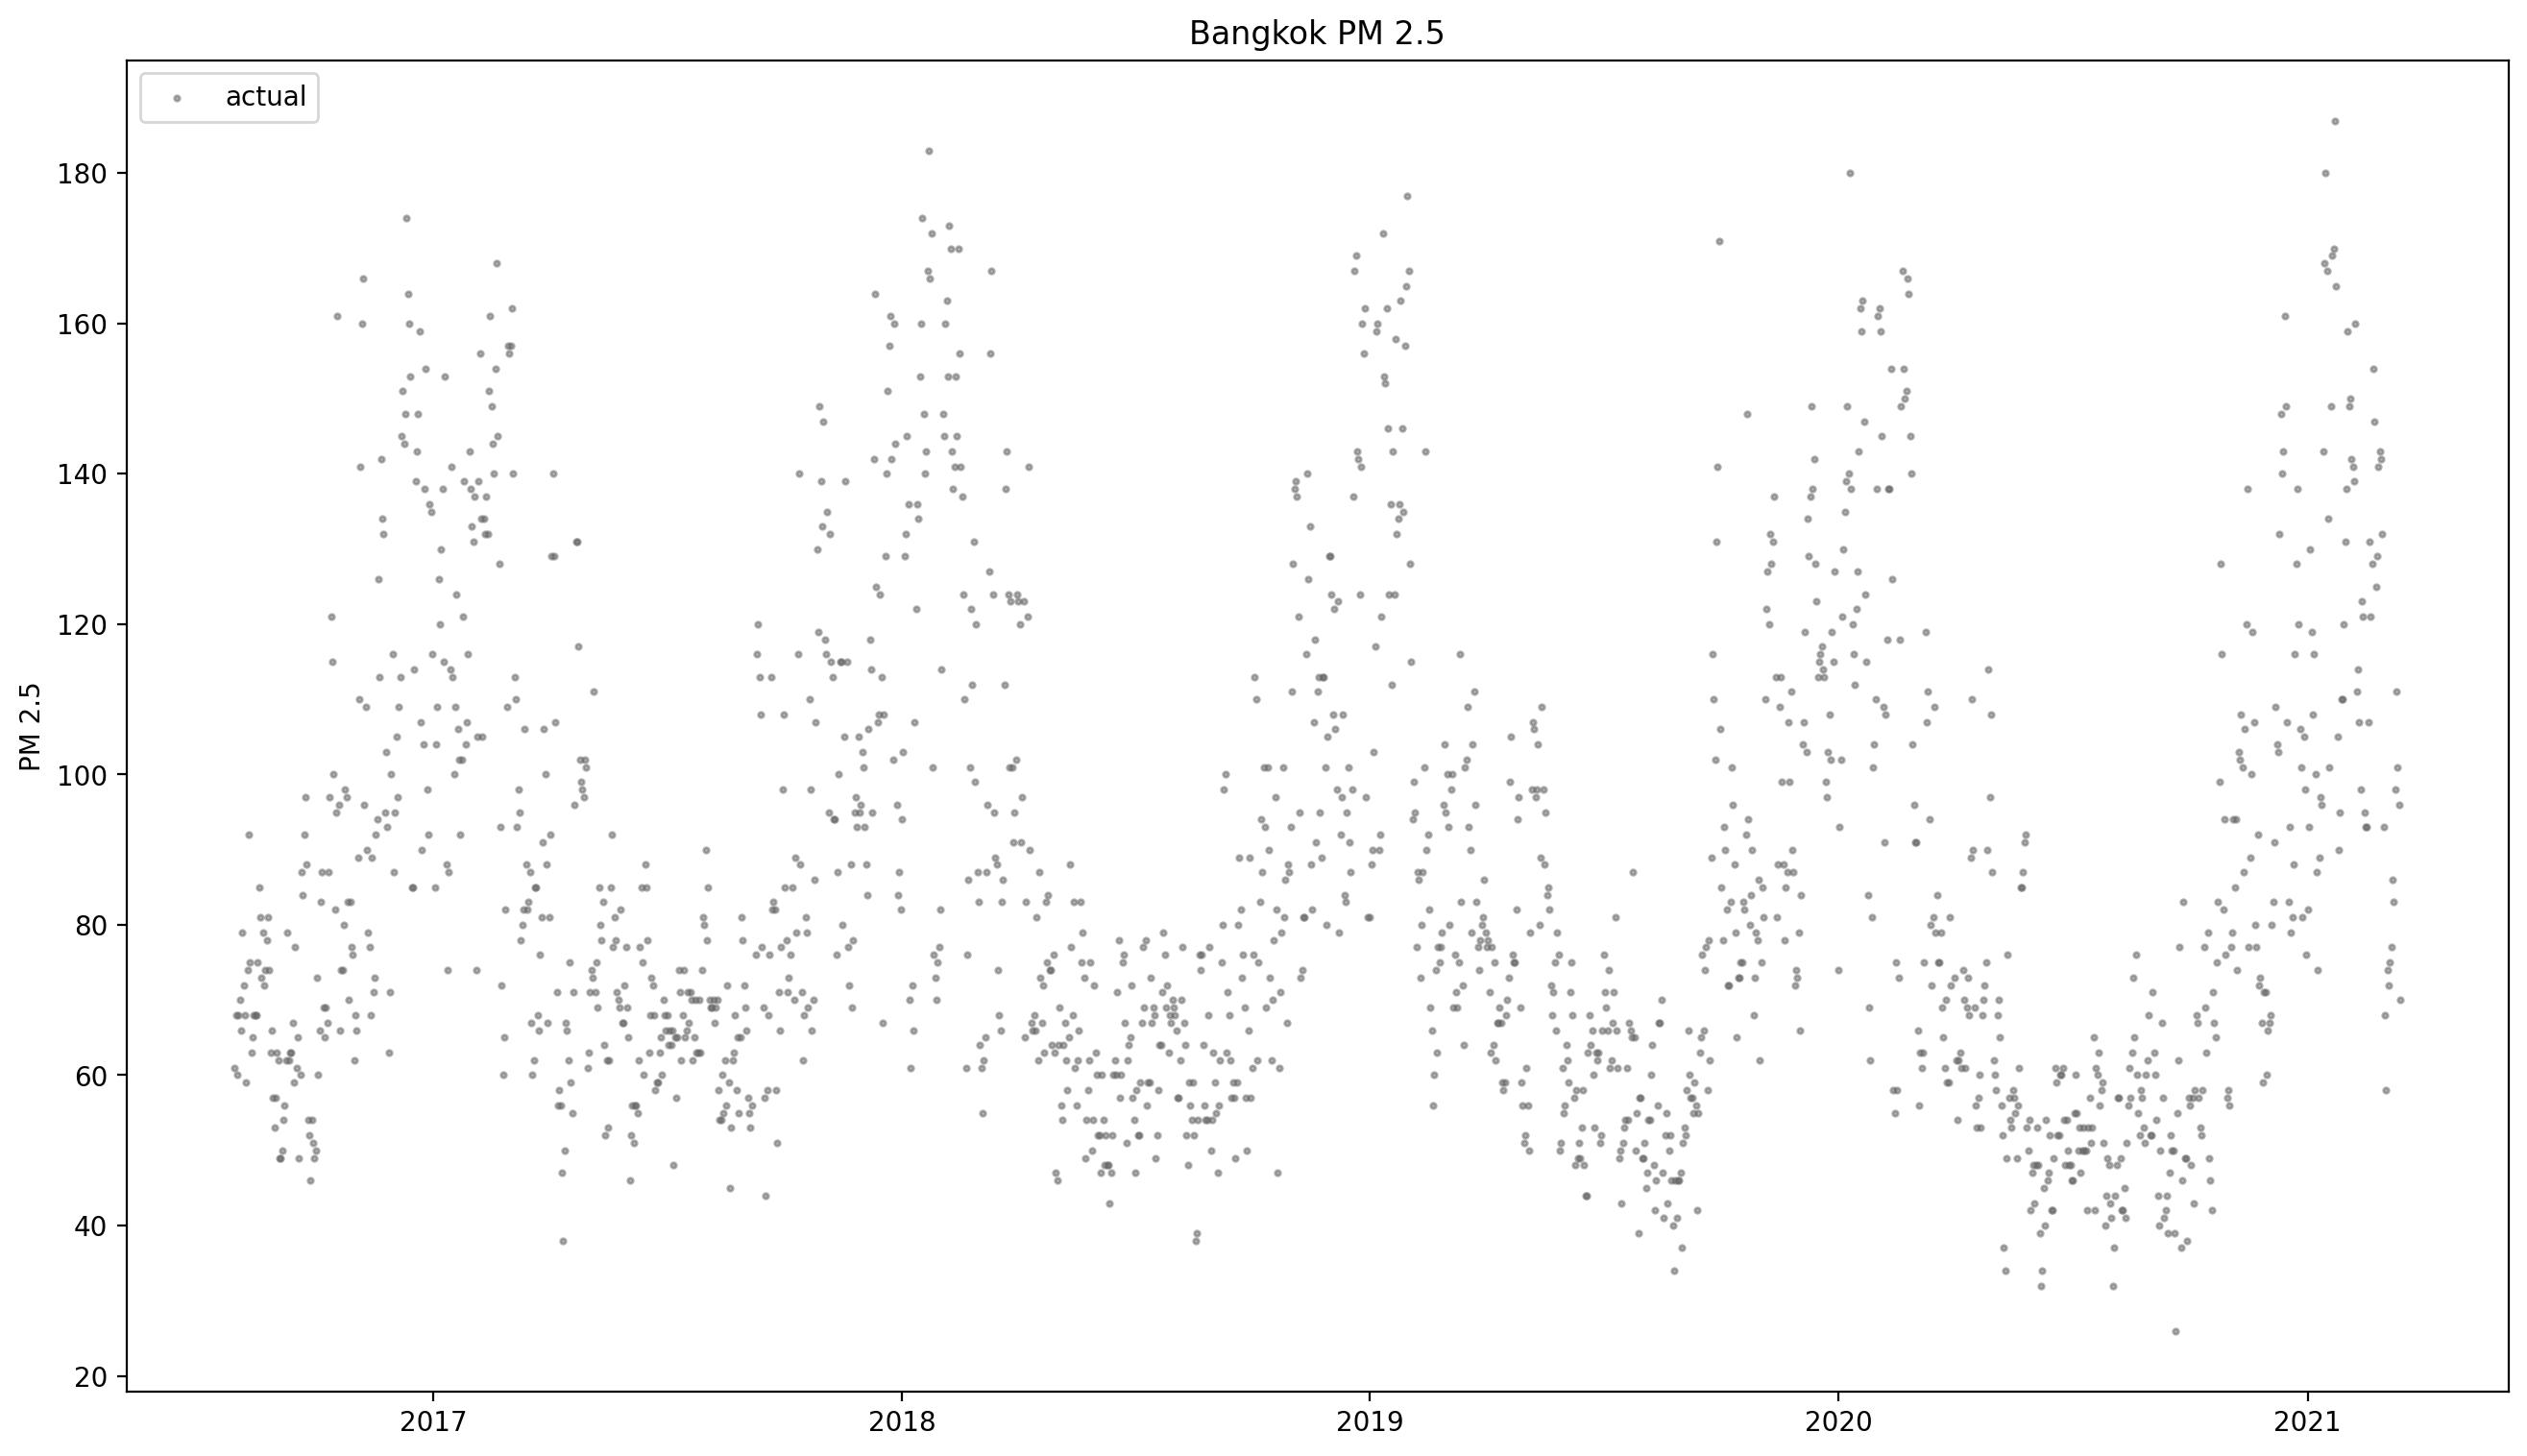

In [22]:
plt.figure(figsize = (16, 9))
plt.scatter(df.index, df[y_col], alpha = .5, s = 4, label = 'actual', color = '.4')
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();

### lightgbm regressor

In [23]:
df.columns

Index(['year', 'month', 'day', 'day_name', 'pm25'], dtype='object')

In [24]:
feature_cols = ['year', 'month', 'day', 'day_name']
feature_cols

['year', 'month', 'day', 'day_name']

In [25]:
X = df[feature_cols]
X.tail()

,year,month,day,day_name
date,,,,
2021-03-10,2021,3,10,Wednesday
2021-03-11,2021,3,11,Thursday
2021-03-12,2021,3,12,Friday
2021-03-13,2021,3,13,Saturday
2021-03-14,2021,3,14,Sunday


In [26]:
y = df[y_col]
y.tail()

date
2021-03-10     98.0
2021-03-11    111.0
2021-03-12    101.0
2021-03-13     96.0
2021-03-14     70.0
Name: pm25, dtype: float64

In [27]:
X.shape

(1680, 4)

In [28]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

print(f'lightgbm version: {lgb.__version__}')

lightgbm version: 4.0.0


In [29]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1512, 4), (168, 4), (1512,), (168,))

In [30]:
split_at = 1400

X_train, X_test, y_train, y_test = X[:split_at], X[split_at:], y[:split_at], y[split_at:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1400, 4), (280, 4), (1400,), (280,))

In [31]:
# create a model

reg = lgb.LGBMRegressor()
reg

LGBMRegressor()

In [32]:
reg.get_params() # default params

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [33]:
# set params

params = {'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1, # set to be -1
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [34]:
# create a model using set params

reg = lgb.LGBMRegressor(**params)
reg

LGBMRegressor(n_jobs=-1)

In [35]:
# train/fit a model

reg.fit(X_train, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1400, number of used features: 4
[LightGBM] [Info] Start training from score 87.292143


LGBMRegressor(n_jobs=-1)

In [36]:
reg.__dict__

{'boosting_type': 'gbdt',
 'objective': None,
 'num_leaves': 31,
 'max_depth': -1,
 'learning_rate': 0.1,
 'n_estimators': 100,
 'subsample_for_bin': 200000,
 'min_split_gain': 0.0,
 'min_child_weight': 0.001,
 'min_child_samples': 20,
 'subsample': 1.0,
 'subsample_freq': 0,
 'colsample_bytree': 1.0,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'random_state': None,
 'n_jobs': -1,
 'importance_type': 'split',
 '_Booster': <lightgbm.basic.Booster at 0x15b2a5f40>,
 '_evals_result': {},
 '_best_score': defaultdict(collections.OrderedDict, {}),
 '_best_iteration': 0,
 '_other_params': {},
 '_objective': 'regression',
 'class_weight': None,
 '_class_weight': None,
 '_class_map': None,
 '_n_features': 4,
 '_n_features_in': 4,
 '_classes': None,
 '_n_classes': -1,
 'fitted_': True}

In [37]:
# get training score

reg.score(X_train, y_train)

0.7922251663582618

In [38]:
# get testing score

reg.score(X_test, y_test)

0.642838220461555

In [39]:
# predict y using first 5 X

reg.predict(X_test[:5])

array([53.18588123, 55.20842796, 57.18226262, 51.61038744, 49.13826266])

### Visualize forecast

In [40]:
df.head()

,year,month,day,day_name,pm25
date,,,,,
2016-07-30,2016,7,30,Saturday,61.0
2016-07-31,2016,7,31,Sunday,68.0
2016-08-01,2016,8,1,Monday,60.0
2016-08-02,2016,8,2,Tuesday,68.0
2016-08-03,2016,8,3,Wednesday,70.0


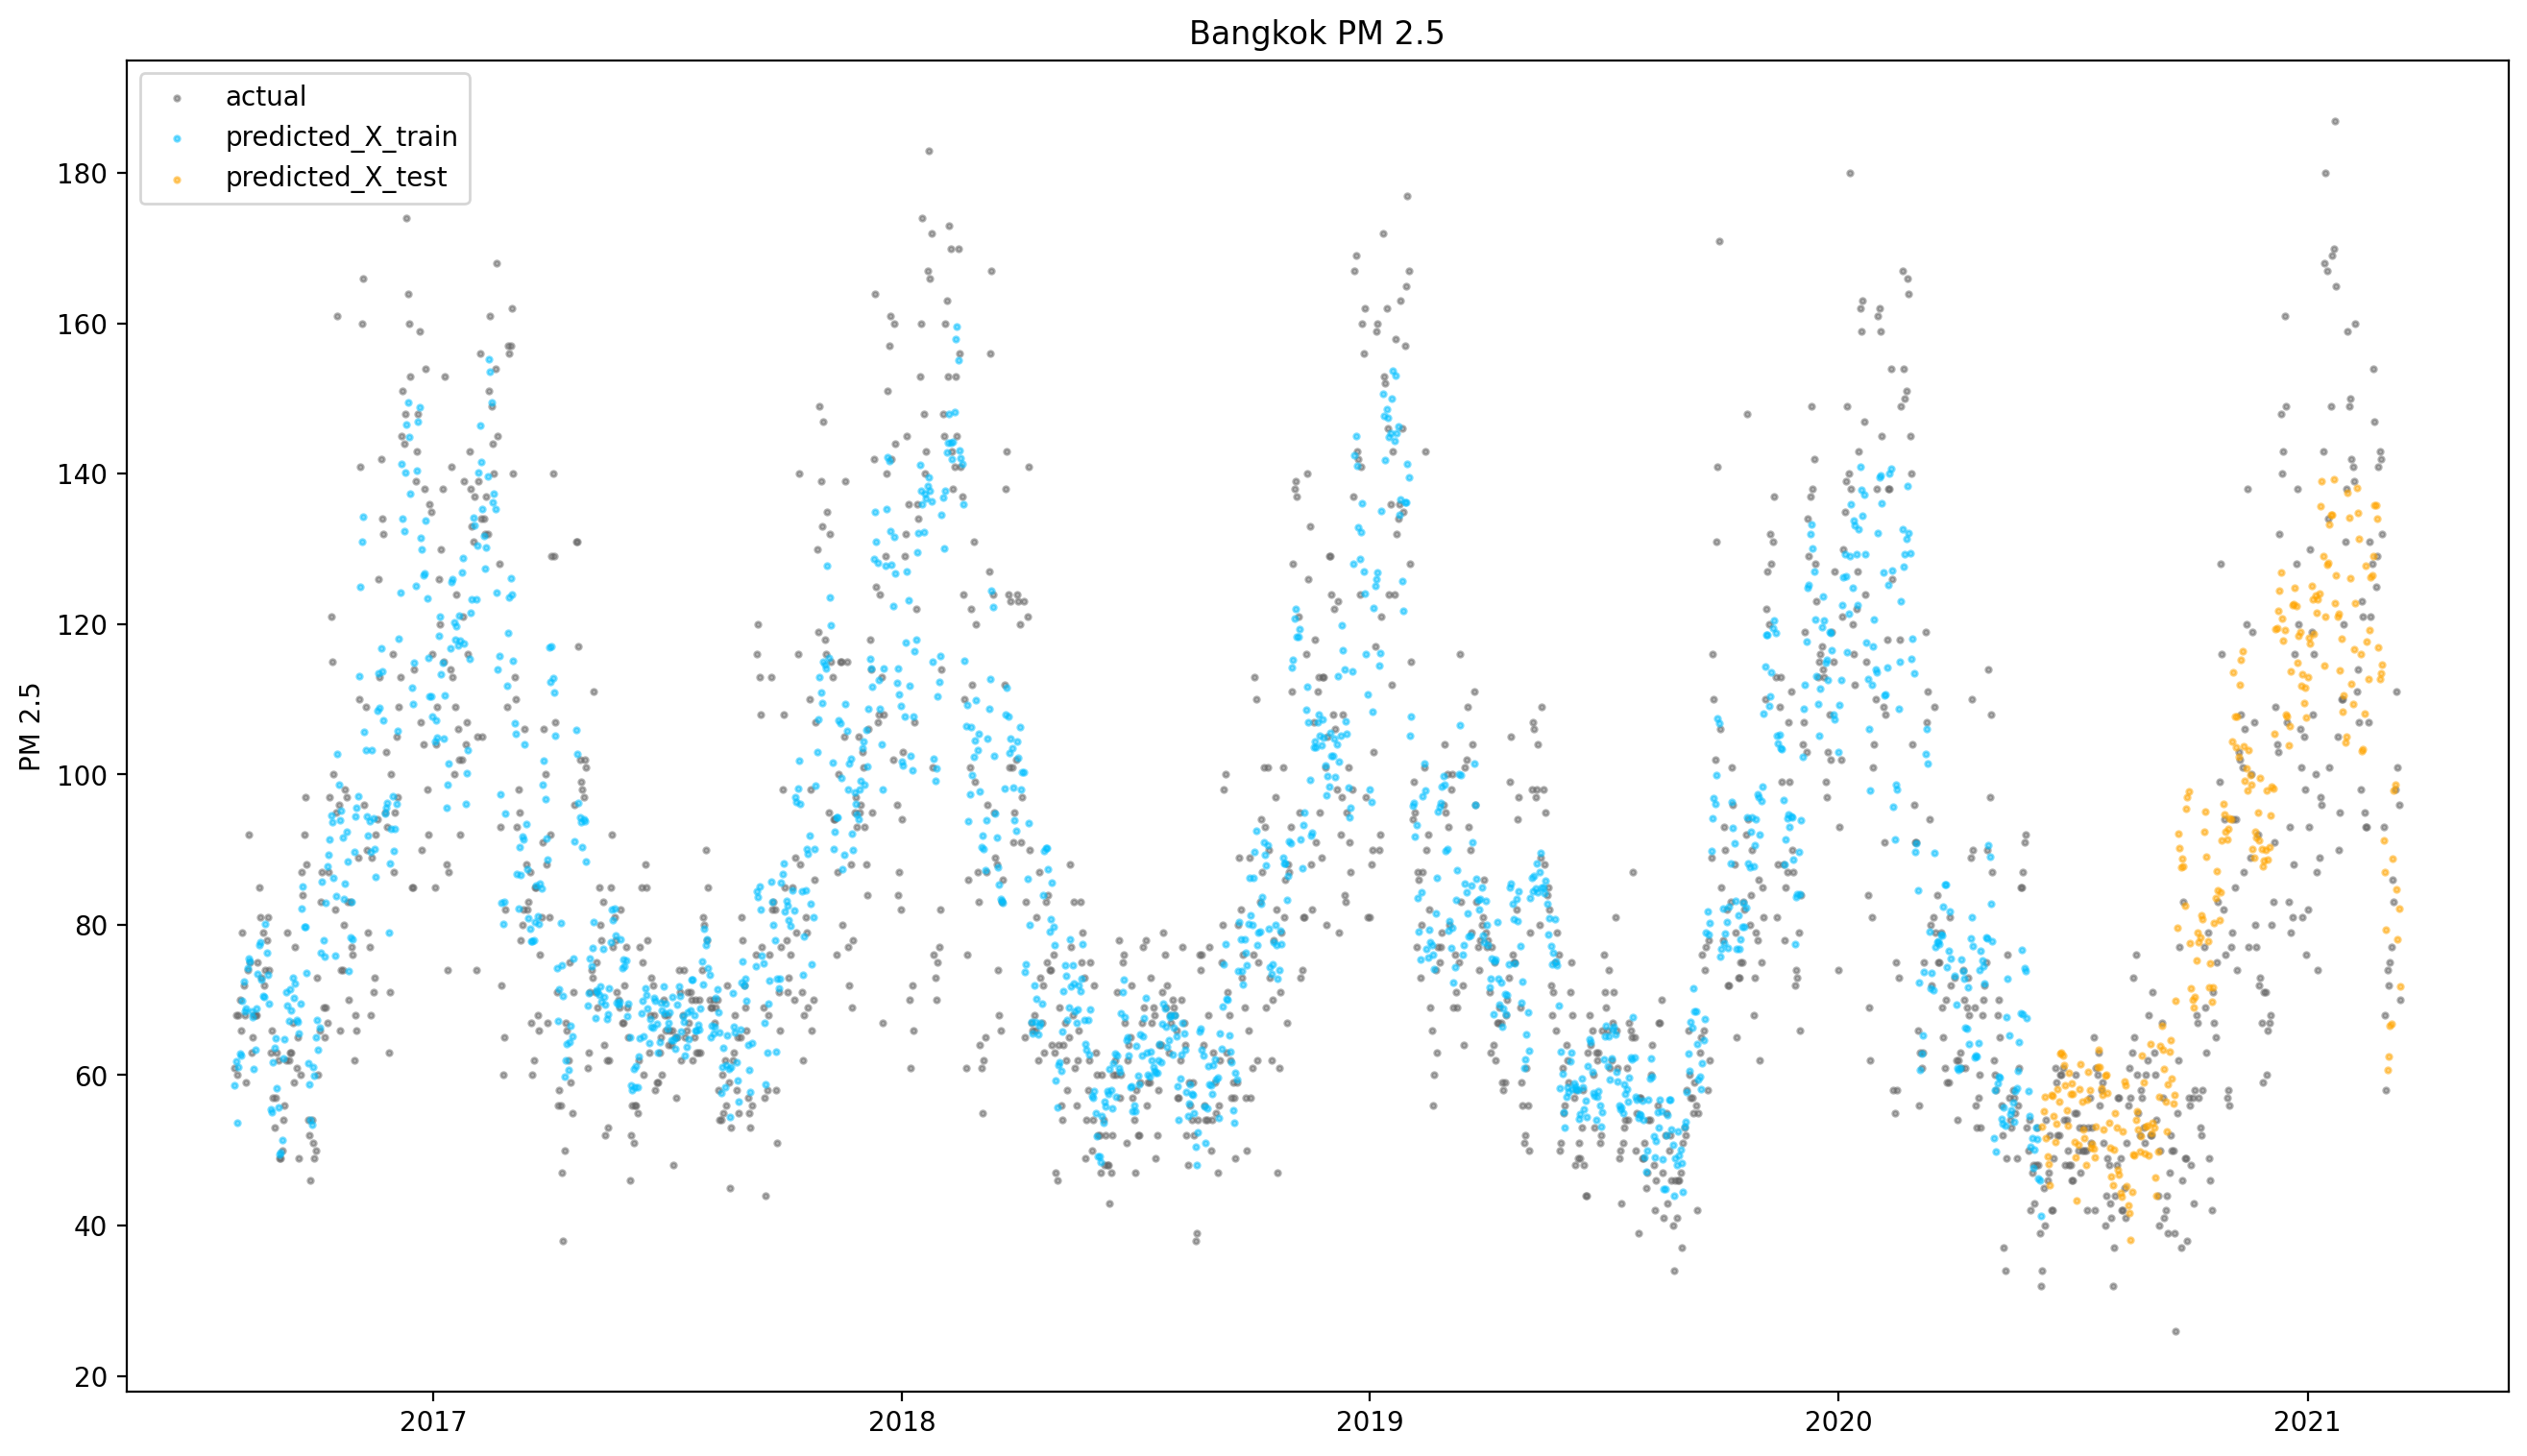

In [41]:
plt.figure(figsize = (16, 9))
plt.scatter(df.index, df[y_col], alpha = .5, s = 4, label = 'actual', color = '.4') # original/actual data
plt.scatter(X_train.index, reg.predict(X_train), alpha = .5, s = 4, label = 'predicted_X_train', color = 'deepskyblue') # predicted y using X_train
plt.scatter(X_test.index, reg.predict(X_test), alpha = .5, s = 4, label = 'predicted_X_test', color = 'orange') # predicted y using X_test
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();

In [42]:
df

,year,month,day,day_name,pm25
date,,,,,
2016-07-30,2016,7,30,Saturday,61.0
2016-07-31,2016,7,31,Sunday,68.0
2016-08-01,2016,8,1,Monday,60.0
2016-08-02,2016,8,2,Tuesday,68.0
2016-08-03,2016,8,3,Wednesday,70.0
...,...,...,...,...,...
2021-03-10,2021,3,10,Wednesday,98.0
2021-03-11,2021,3,11,Thursday,111.0
2021-03-12,2021,3,12,Friday,101.0


### SHAP

In [43]:
np.__version__

'1.25.2'

In [44]:
# pip install numba --upgrade # could not import shap and required to upgrade numba

In [45]:
# import a library

import shap

In [46]:
# load JS visualization code to notebook

shap.initjs()

In [47]:
X

,year,month,day,day_name
date,,,,
2016-07-30,2016,7,30,Saturday
2016-07-31,2016,7,31,Sunday
2016-08-01,2016,8,1,Monday
2016-08-02,2016,8,2,Tuesday
2016-08-03,2016,8,3,Wednesday
...,...,...,...,...
2021-03-10,2021,3,10,Wednesday
2021-03-11,2021,3,11,Thursday
2021-03-12,2021,3,12,Friday


In [48]:
X.tail

<bound method NDFrame.tail of             year  month  day   day_name
date                                   
2016-07-30  2016      7   30   Saturday
2016-07-31  2016      7   31     Sunday
2016-08-01  2016      8    1     Monday
2016-08-02  2016      8    2    Tuesday
2016-08-03  2016      8    3  Wednesday
...          ...    ...  ...        ...
2021-03-10  2021      3   10  Wednesday
2021-03-11  2021      3   11   Thursday
2021-03-12  2021      3   12     Friday
2021-03-13  2021      3   13   Saturday
2021-03-14  2021      3   14     Sunday

[1680 rows x 4 columns]>

In [49]:
X.loc[['2021-03-11']]

,year,month,day,day_name
date,,,,
2021-03-11,2021,3,11,Thursday


In [50]:
Xi = pd.DataFrame([[2016, 3, 17, 'Wednesday']])
Xi

,0,1,2,3
0,2016,3,17,Wednesday


In [51]:
Xi = np.array([[2016, 3, 17, 6]])
Xi

array([[2016,    3,   17,    6]])

In [52]:
# explain the model's predictions using SHAP

explainer = shap.TreeExplainer(reg)
explainer

In [53]:
# shap_values = explainer.shap_values(X.loc[['2021-03-04']])
# shap_values = explainer.shap_values(np.array([[2016,3,17,6]]))
shap_values = explainer.shap_values(X)
shap_values

array([[ 1.80949609e-01, -2.11203442e+01, -5.75689366e+00,
        -1.89714703e+00],
       [ 4.11157798e-01, -2.07441090e+01, -3.30583832e+00,
        -1.83016616e+00],
       [ 1.64043753e-02, -2.54410661e+01, -6.05287476e+00,
        -2.11723381e+00],
       ...,
       [-7.22426341e+00,  3.84161578e-01,  4.13491261e+00,
        -6.46857110e+00],
       [-8.78740171e+00,  2.30185933e+00,  3.14945568e+00,
        -1.83923593e+00],
       [-8.47929676e+00, -5.17599129e-01, -2.41259486e+00,
        -4.06237803e+00]])

In [54]:
explainer.__dict__

{'model': <shap.explainers._tree.TreeEnsemble at 0x28127b430>,
 'output_names': None,
 'feature_names': None,
 'masker': None,
 'link': CPUDispatcher(<function identity at 0x15c576b80>),
 'linearize_link': True,
 'data': None,
 'data_missing': None,
 'feature_perturbation': 'tree_path_dependent',
 'expected_value': 87.29214909186712,
 'model_output': 'raw',
 'approximate': False}

In [55]:
reg.predict(X_train).mean() # explainer.expexted_value

87.29214909186707

In [56]:
shap_values[:3]

array([[ 1.80949609e-01, -2.11203442e+01, -5.75689366e+00,
        -1.89714703e+00],
       [ 4.11157798e-01, -2.07441090e+01, -3.30583832e+00,
        -1.83016616e+00],
       [ 1.64043753e-02, -2.54410661e+01, -6.05287476e+00,
        -2.11723381e+00]])

In [57]:
shap_values.shape

(1680, 4)

In [58]:
X[:5]

,year,month,day,day_name
date,,,,
2016-07-30,2016,7,30,Saturday
2016-07-31,2016,7,31,Sunday
2016-08-01,2016,8,1,Monday
2016-08-02,2016,8,2,Tuesday
2016-08-03,2016,8,3,Wednesday


In [59]:
feature_cols

['year', 'month', 'day', 'day_name']

In [60]:
# shap values of each case

dshap = pd.DataFrame(shap_values, columns = feature_cols)
dshap

,year,month,day,day_name
0,0.180950,-21.120344,-5.756894,-1.897147
1,0.411158,-20.744109,-3.305838,-1.830166
2,0.016404,-25.441066,-6.052875,-2.117234
3,0.270988,-23.196270,-5.163187,1.931157
4,0.702355,-23.609698,-4.003380,2.452989
...,...,...,...,...
1675,-3.164412,3.105169,8.214020,3.170361
1676,-6.659293,0.915624,7.478342,-4.299499
1677,-7.224263,0.384162,4.134913,-6.468571
1678,-8.787402,2.301859,3.149456,-1.839236


In [61]:
X[:5]

,year,month,day,day_name
date,,,,
2016-07-30,2016,7,30,Saturday
2016-07-31,2016,7,31,Sunday
2016-08-01,2016,8,1,Monday
2016-08-02,2016,8,2,Tuesday
2016-08-03,2016,8,3,Wednesday


In [62]:
X.tail()

,year,month,day,day_name
date,,,,
2021-03-10,2021,3,10,Wednesday
2021-03-11,2021,3,11,Thursday
2021-03-12,2021,3,12,Friday
2021-03-13,2021,3,13,Saturday
2021-03-14,2021,3,14,Sunday


In [63]:
np.abs(dshap).mean().sort_values(ascending = False)

month       20.181854
day          3.947147
year         3.760689
day_name     1.770988
dtype: float64

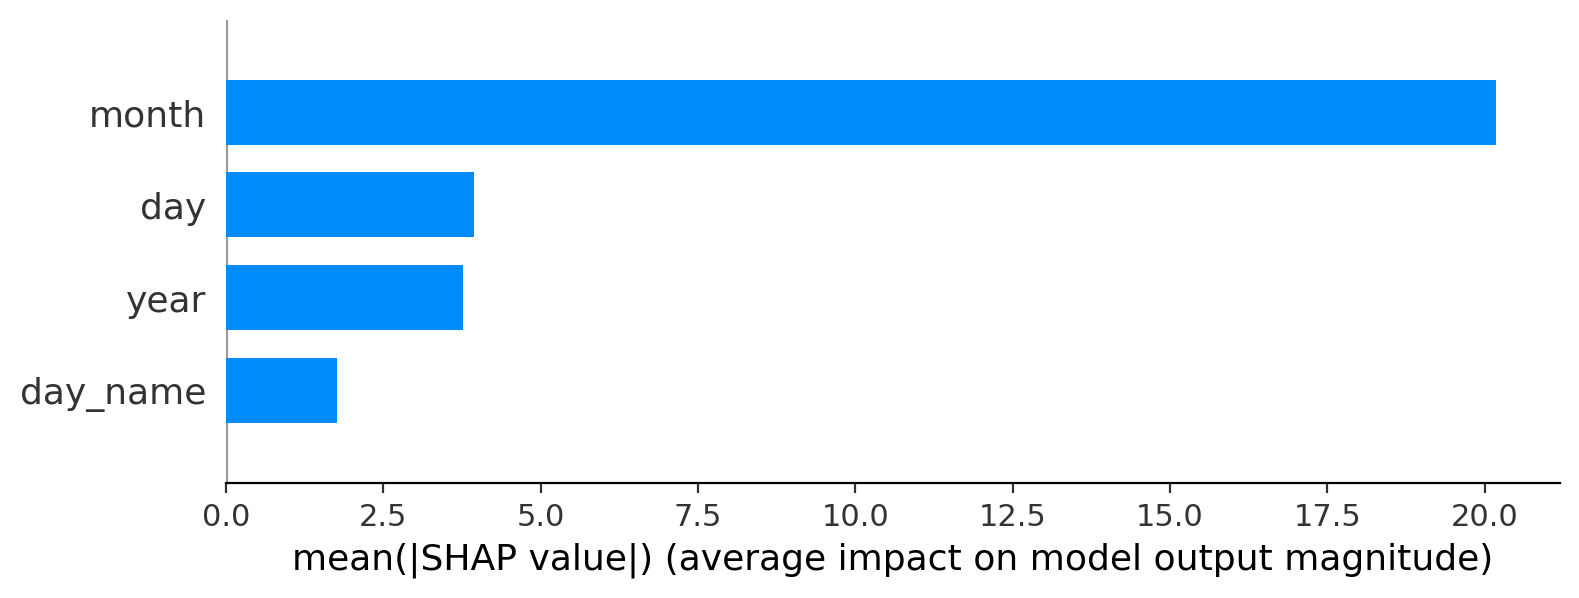

In [64]:
shap.summary_plot(shap_values, X, plot_type = 'bar')

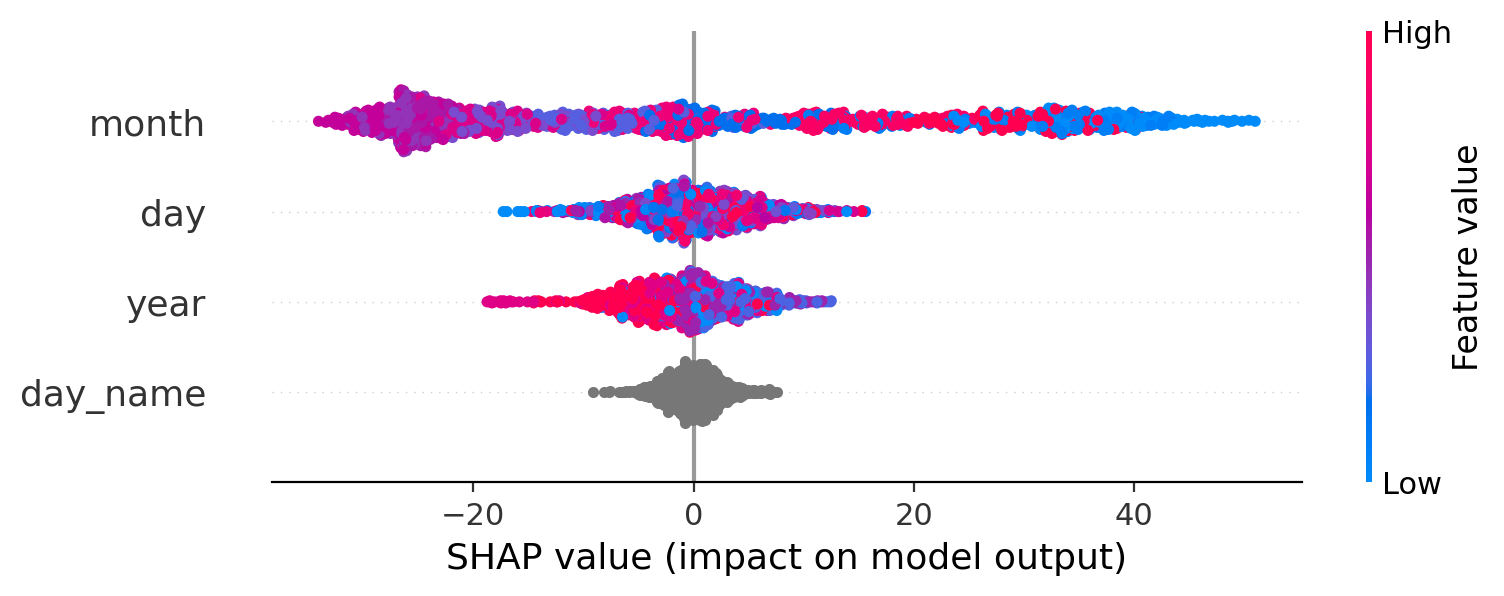

In [65]:
# summarize the effects of all the features

shap.summary_plot(shap_values, X)

In [66]:
explainer.shap_values(X)

array([[ 1.80949609e-01, -2.11203442e+01, -5.75689366e+00,
        -1.89714703e+00],
       [ 4.11157798e-01, -2.07441090e+01, -3.30583832e+00,
        -1.83016616e+00],
       [ 1.64043753e-02, -2.54410661e+01, -6.05287476e+00,
        -2.11723381e+00],
       ...,
       [-7.22426341e+00,  3.84161578e-01,  4.13491261e+00,
        -6.46857110e+00],
       [-8.78740171e+00,  2.30185933e+00,  3.14945568e+00,
        -1.83923593e+00],
       [-8.47929676e+00, -5.17599129e-01, -2.41259486e+00,
        -4.06237803e+00]])

In [67]:
# create funtions

def case_detail(case_data):

    '''
    format obj returned from shap.force_plot()
    '''

    de = pd.DataFrame(case_data.data['features'])
    fcols = []

    for i in case_data.data['features'].keys():
        fcols.append(case_data.data['featureNames'][i])

    de.columns = fcols
    
    return de

def individual_case_plot(explainer, X, case_index):

    """
    >>> individual_case_plot(explainer, X_train, 1)
    """
    shap_values = explainer.shap_values(X.iloc[[case_index]])
    g = shap.force_plot(explainer.expected_value, shap_values = shap_values, features = X.iloc[case_index, :])
    
#     shap_values = explainer.shap_values(X)
#     g=shap.force_plot(explainer.expected_value, shap_values=shap_values[case_index], features=X.iloc[case_index, :])
#     print('SHAP values')
#     dshap=pd.DataFrame(shap_values, columns=feature_cols)
#     dpos=dshap.iloc[case_index][dshap.iloc[case_index].values > 0].sort_values(ascending=False)
#     dneg=dshap.iloc[case_index][dshap.iloc[case_index].values < 0].sort_values(ascending=False)
#     print(dpos)
#     print(f'sum pos = {dpos.sum():.6f}')
#     print(dneg)
#     print(f'sum neg = {dneg.sum():.6f}')

#     print(f'sum SHAP = {dpos.sum()+dneg.sum():.6f}')
#     print(f'base      value = {explainer.expected_value:.2f}')
#     print(f'predicted value = {explainer.expected_value + dpos.sum() + dneg.sum():.2f}')
#     pprint(g.data)
    return g

In [68]:
X[:3]

,year,month,day,day_name
date,,,,
2016-07-30,2016,7,30,Saturday
2016-07-31,2016,7,31,Sunday
2016-08-01,2016,8,1,Monday


In [69]:
X.iloc[[3]]

,year,month,day,day_name
date,,,,
2016-08-02,2016,8,2,Tuesday


In [70]:
X.iloc[[2]]

,year,month,day,day_name
date,,,,
2016-08-01,2016,8,1,Monday


In [71]:
# call a functin

individual_case_plot(explainer, X, 0)

In [72]:
g = individual_case_plot(explainer, X, 0)
g

In [73]:
g.__dict__

{'data': {'outNames': ['f(x)'],
  'baseValue': 87.29214909186712,
  'outValue': 58.698713776023226,
  'link': 'identity',
  'featureNames': ['year', 'month', 'day', 'day_name'],
  'features': {0: {'effect': 0.18094960882783642, 'value': 2016.0},
   1: {'effect': -21.1203442414426, 'value': 7.0},
   2: {'effect': -5.756893655524079, 'value': 30.0},
   3: {'effect': -1.8971470277050482, 'value': 'Saturday'}},
  'plot_cmap': 'RdBu',
  'labelMargin': 20}}

In [74]:
de = case_detail(g)
de

,year,month,day,day_name
effect,0.18095,-21.120344,-5.756894,-1.897147
value,2016.00000,7.000000,30.000000,Saturday


In [75]:
de.loc['effect', :].sum()

-28.593435315843887

In [76]:
de.loc['effect', :].sum() + g.data['baseValue']

58.698713776023226

In [77]:
sum_effect = 0

for k, v in g.data['features'].items():

    sum_effect += v['effect']
    
sum_effect

-28.593435315843887

In [78]:
g.data['baseValue'] + sum_effect

58.698713776023226

In [79]:
g = individual_case_plot(explainer, X, 120)
g

In [80]:
case_detail(g)

,year,month,day,day_name
effect,-4.21227,10.593463,-11.096179,-3.591223
value,2016.00000,11.000000,27.000000,Sunday


In [81]:
shap.force_plot(explainer.expected_value, shap_values[: 365], X[: 365])

In [82]:
X

,year,month,day,day_name
date,,,,
2016-07-30,2016,7,30,Saturday
2016-07-31,2016,7,31,Sunday
2016-08-01,2016,8,1,Monday
2016-08-02,2016,8,2,Tuesday
2016-08-03,2016,8,3,Wednesday
...,...,...,...,...
2021-03-10,2021,3,10,Wednesday
2021-03-11,2021,3,11,Thursday
2021-03-12,2021,3,12,Friday
